<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
from sklearn.neighbors.kde import KernelDensity
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
# Load the Training and Test sets
Train = np.loadtxt('TP1_train.tsv', delimiter='\t')
Test = np.loadtxt('TP1_test.tsv', delimiter='\t')

# Shuffles the test and train sets
np.random.shuffle(Train)
np.random.shuffle(Test)

In [3]:
# labels
Y_Train = Train[:, -1]
Y_Test = Test[:, -1]


# standartize the train and test values
Xmeans = np.mean(Test[:, :-1], axis=0)
Xstd = np.std(Test[:, :-1], axis=0)
X_Test = (Test[:, :-1]-Xmeans)/Xstd

Xmeans = np.mean(Train[:, :-1], axis=0)
Xstd = np.std(Train[:, :-1], axis=0)
X_Train = (Train[:, :-1]-Xmeans)/Xstd

data = np.column_stack((X_Train, Y_Train))

In [4]:
# Developing the model


def Kde_model(bw, data):
    # Returns the classifier list for the given bandwidth and data
    # The data must be [[feats],y]
    kde_list = [[], []]

    data_0 = data[data[:, -1] == 0]

    data_1 = data[data[:, -1] == 1]

    # Class 0
    X_feats = data_0[:, :-1]

    # Y=data_0[:,-1]
    for feat in range(X_feats.shape[1]):

        X_y = X_feats[:, feat]

        kde = KernelDensity(kernel='gaussian', bandwidth=bw)
        kde.fit(X_y.reshape(-1, 1))
        kde_list[0].append(kde)

    # Class 1
    X_feats = data_1[:, :-1]
    # Y=data_1[:,-1]
    for feat in range(X_feats.shape[1]):
        X_y = X_feats[:, feat]

        kde = KernelDensity(kernel='gaussian', bandwidth=bw)
        kde.fit(X_y.reshape(-1, 1))
        kde_list[1].append(kde)

    return kde_list

In [5]:
def Kde_class(kde, data):
    # Returns a score for the given kde and data
    # data must be [[feats],y]
    cla = [0, 1]
    data_x = data[:, :-1]
    y = data[:, -1]
    sc = []
    score = []
    data_y = []

    for c in cla:
        for feat in range(np.shape(kde)[1]):
            k = kde[c][feat]
            sc.append(k.score_samples(data_x[:, feat].reshape(-1, 1)))

        score.append(np.sum(sc, axis=0))
        sc = []

    data_y.append(np.argmax(score, axis=0))

    return np.squeeze(data_y)

In [6]:
def Calc_err(y_true, y_pred):
    # Calculates the err of the y_pred vector

    cm = confusion_matrix(y_true, y_pred)

    acc = np.trace(cm)/np.sum(cm)
    return (1-acc)

In [7]:
def Kde_cross_validation(bandwidth, data):
    # cross validates the model for the given bandwidth vector
    # returns the best bandwidth
    # The data must be [x,y]

    kf = StratifiedKFold(n_splits=5)
    y_true = data[:, -1]
    train_err = val_err = []
    vaerr = []
    trerr = []

    for bw in bandwidth:
        for tr_ix, va_ix in kf.split(data[:, :-1], data[:, -1]):
            # Fit the data for a certain fold and save the value of the score
            kde = Kde_model(bw, data[tr_ix])
            y_pred_tr = Kde_class(kde, data[tr_ix])
            y_pred_val = Kde_class(kde, data[va_ix])

            train_err.append(Calc_err(y_true[tr_ix], y_pred_tr))
            val_err.append(Calc_err(y_true[va_ix], y_pred_val))

        vaerr.append(np.mean(val_err, axis=0))
        trerr.append(np.mean(train_err, axis=0))
        train_err = []
        val_err = []

    best_bw = bandwidth[np.argmin(vaerr)]
    return best_bw, trerr, vaerr

In [8]:
# Defines the range of the bandwidth cross validation testing

bandwidth = np.arange(0.02, 0.6, 0.02)

best_bw, train_err, val_err = Kde_cross_validation(bandwidth, data)

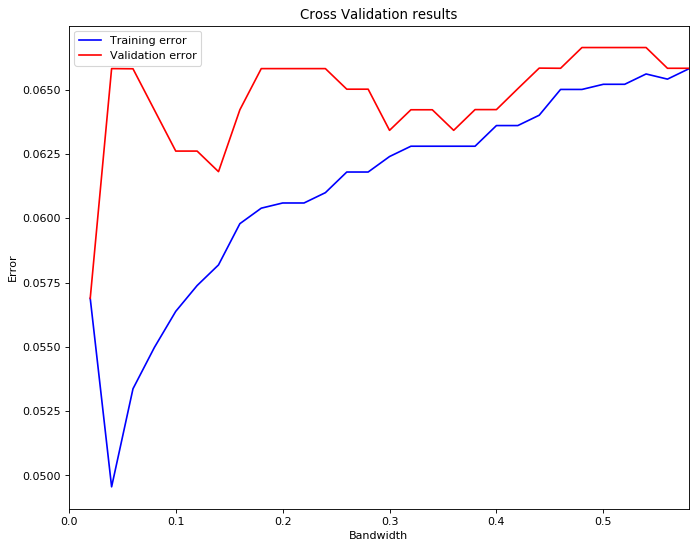

In [9]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
tr = plt.plot(bandwidth, train_err, color="b")
va = plt.plot(bandwidth, val_err, color="r")

axes = plt.gca()
axes.set_xlim(0, np.max(bandwidth))
axes.set_ylabel("Error")
axes.set_xlabel("Bandwidth")

plt.title('Cross Validation results')
plt.legend(['Training error', 'Validation error'])
plt.savefig('NB.png')

In [ ]:
import seaborn as sns
import pandas as pd
Df=pd.DataFrame(data,columns=["x1","x2","x3","x4","target_column"])
sns.pairplot(Df, hue="target_column")


/opt/anaconda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [ ]:
Df